# Machine learning

In [154]:
import csv


data_list = []  # read csv file
car_data = "data/km_year_power_price.csv"
data = csv.reader(open(car_data))
for row in data:
    data_list.append(row)
data_list.remove(data_list[0])


In [159]:
# change list for right format
import numpy as np

price = []
for i in range(len(data_list)):
        price.append(float(data_list[i][3]))

km = []
for i in range(len(data_list)):
        km.append(int(data_list[i][0]))
km_np = np.array(km)

year = []
for i in range(len(data_list)):
        year.append(int(data_list[i][1]))
year_np = np.array(year)

power = []
for i in range(len(data_list)):
        power.append(int(data_list[i][2]))
power_np = np.array(power)

values = []
for i in range(len(data_list)):
    values.append([power[i], year[i], km[i]])

values2 = []
for i in range(len(data_list)):
    values2.append([power[i], year[i]])
values2 = np.array(values2)


[[  40 2001]
 [  40 2001]
 [  60 2001]
 ...
 [ 260 2015]
 [ 300 2015]
 [ 300 2015]]


In [164]:
# linear regression with LinearRegression
from sklearn import linear_model

def linear_regression(x,y):
    reg = linear_model.LinearRegression().fit(x, y)
    print(f'score :{reg.score}')
    print(f'coef :{reg.coef_}')
    print(f'intercept :{reg.intercept_}')

linear_regression(km_np.reshape(-1, 1), price)
linear_regression(year_np.reshape(-1, 1), price)
linear_regression(power_np.reshape(-1, 1), price)
linear_regression(values2, price)


score :<bound method RegressorMixin.score of LinearRegression()>
coef :[-0.05425151]
intercept :16692.34530251974
score :<bound method RegressorMixin.score of LinearRegression()>
coef :[1509.09382534]
intercept :-3018309.484956955
score :<bound method RegressorMixin.score of LinearRegression()>
coef :[90.33080719]
intercept :-1303.912698987986
score :<bound method RegressorMixin.score of LinearRegression()>
coef :[  80.43004469 1325.2284004 ]
intercept :-2661196.78674901
0.8491518804322802


In [ ]:
# linear regression with linregress
from scipy import stats

res1 = stats.linregress(km, price)
res2 = stats.linregress(year, price)
res3 = stats.linregress(power, price)


In [ ]:
# plot with linregress
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x,y):
    reg = stats.linregress(x, y)
    plt.plot(x, y,'o', label='original data')
    plt.plot(x, reg.intercept + reg.slope * x, 'r', label=f'fitted data, R-squared :{reg.rvalue**2:.4f}')
    plt.legend()
    plt.show()

plot(km_np, price)
plot(year_np, price)
plot(power_np, price)

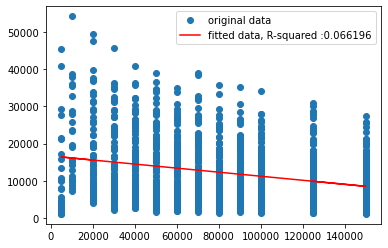

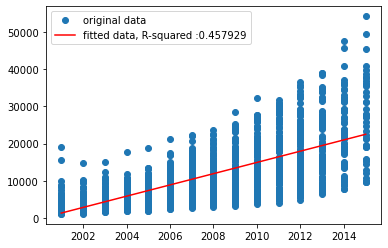

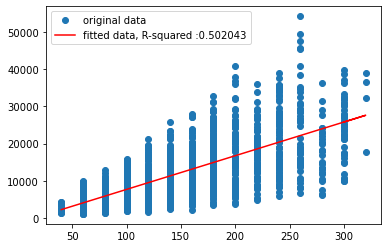

In [169]:
# plot with linear_regression

def plot_2(x, y):
    res = linear_model.LinearRegression().fit(x.reshape(-1, 1), y)
    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, res.intercept_ + res.coef_ * x , 'r', label=f'fitted data, R-squared :{res.score(x.reshape(-1, 1), y):.6f}')
    plt.legend()
    plt.show()

plot_2(km_np, price)
plot_2(year_np, price)
plot_2(power_np, price)

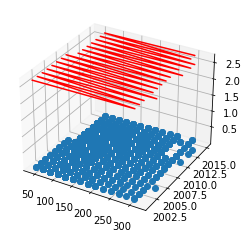

In [174]:
from mpl_toolkits import mplot3d
# 3d plot
def plot3(x, y, z):
    plot_3 = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'o')
    ax.plot3D(x, y, 80.42 * x + 1325.228 * y, 'r')

plot3(power_np, year_np, price)